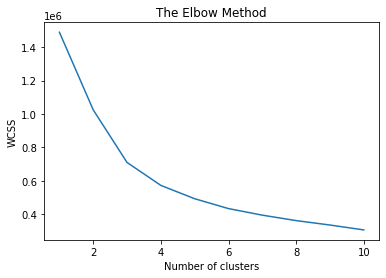

In [78]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('cluster_weight.csv')


drops=['id','hdl','ratio','stab_glu','location','frame','weight_1','bp_1d','bp_2d','bp_1s','bp_2s','time_ppn']
df.drop(drops,inplace=True,axis=1)

df.fillna(value=df.mean(),inplace=True)

X=df.values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [80]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [81]:
print(y_kmeans)


[1 3 3 2 2 2 2 2 2 0 0 0 1 1 2 1 0 2 2 0 2 2 3 0 1 1 3 2 1 2 1 2 2 0 2 1 2
 2 2 2 1 0 2 0 3 1 2 1 3 2 0 0 0 0 3 2 0 0 0 2 0 1 1 1 0 1 0 2 3 1 3 2 0 0
 2 3 0 2 0 2 1 1 2 0 0 0 2 2 0 1 2 1 1 1 0 3 2 1 2 0 2 0 2 0 0 2 2 2 2 0 1
 2 3 2 2 0 2 0 2 1 3 1 0 2 1 3 1 0 3 1 2 3 3 2 1 1 1 2 1 2 2 3 0 2 3 1 2 2
 3 2 2 1 2 3 3 2 0 1 1 1 2 1 1 1 1 3 2 2 1 2 0 0 2 2 0 2 1 2 2 0 2 2 0 1 1
 1 1 2 1 0 3 0 2 1 1 2 0 2 2 2 0 1 0 2 1 0 2 2 1 1 1 0 1 1 2 0 0 2 1 1 2 0
 2 0 2 2 0 2 1 2 2 0 3 0 2 1 2 1 1 1 0 3 1 0 1 2 1 1 3 2 3 2 3 3 2 1 2 0 1
 2 3 1 2 2 1 1 1 3 1 3 2 0 2 1 2 1 0 1 1 2 0 2 2 0 2 2 2 1 1 3 1 1 0 1 3 1
 2 1 1 3 2 1 0 2 2 2 1 1 0 3 2 2 0 2 2 2 2 3 2 2 1 3 2 1 2 1 0 1 0 2 0 3 0
 3 1 3 2 1 2 2 3 3 2 3 2 2 2 2 2 0 1 0 0 0 1 2 2 0 1 1 0 1 1 2 2 2 2 2 1 0
 2 0 3 2 0 1 0 2 2 0 0 2 2 1 2 0 2 0 0 0]


In [82]:
arr=y_kmeans
df['cluster'] = arr.tolist()
df

,chol,glyhb,age,gender,height,weight_2,waist,hip,cluster
0,203.0,4.310000,46,female,62.0,119,29.0,38.0,1
1,165.0,4.440000,29,female,64.0,218,46.0,48.0,3
2,228.0,4.640000,58,female,61.0,243,49.0,57.0,3
3,78.0,4.630000,67,male,67.0,121,33.0,38.0,2
4,249.0,7.720000,64,male,68.0,179,44.0,41.0,2
...,...,...,...,...,...,...,...,...,...
385,301.0,4.280000,89,female,61.0,121,31.0,41.0,0
386,296.0,16.110001,53,male,69.0,189,35.0,39.0,2
387,284.0,4.390000,51,female,63.0,154,32.0,43.0,0
388,194.0,13.630000,29,female,69.0,170,33.0,40.0,0


In [83]:

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [84]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#accuarcy = 92.3%

[[14  1  0  0]
 [ 0 22  0  0]
 [ 0  0 28  0]
 [ 1  2  2  8]]


In [96]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#optimal solution accuarcy=94.5

[[15  0  0  0]
 [ 0 22  0  0]
 [ 0  0 28  0]
 [ 0  2  2  9]]


[1]
